# Data Aggregation and Group Operations

# **T. Prathima**, Assistant Professor, Dept. of IT, CBIT(A)

Reference:
Python for Data Analysis DATA WRANGLING WITH PANDAS, NUMPY, AND IPYTHON
Author: Wes McKinney

In [ ]:
#Categorzing a dataset and applying a function to each group, whether an 
#aggregation or transformation, is often a critical component of a data analysis 
#workflow. After loading, merging, and preparing a dataset, you may need to 
#compute group statistics or possibly pivot tables for reporting or 
#visualization purposes. pandas provides a flexible groupby interface, enabling 
#you to slice, dice, and summarize datasets in a natural way.

In [ ]:
#1. Split a pandas object into pieces using one or more keys 
#(in the form of functions, arrays, or DataFrame column names)
#2. Calculate group summary statistics, like count, mean, or standard deviation, 
#or a user-defined function
#3. Apply within-group transformations or other manipulations,like normalization,
#linear regression, rank, or subset selection
#4. Compute pivot tables and cross-tabulations
#5. Perform quantile analysis and other statistical group analyses

In [ ]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [ ]:
#Hadley Wickham, an author of many popular packages for the R-language,
#coined the term split-apply-combine for describing group operations. In the
#first stage of the process, data contained in a pandas object, whether a Series, 
#Data‐Frame, or otherwise, is split into groups based on one or more keys that 
#you provide.
#The splitting is performed on a particular axis of an object. For example, a 
#DataFrame can be grouped on its rows (axis=0) or its columns (axis=1). 
#Once this is done, a function is applied to each group, producing a new value. 
#Finally, the results of all those function applications are combined into a 
#result object. The form of the resulting object will usually depend on what’s 
#being done to the data

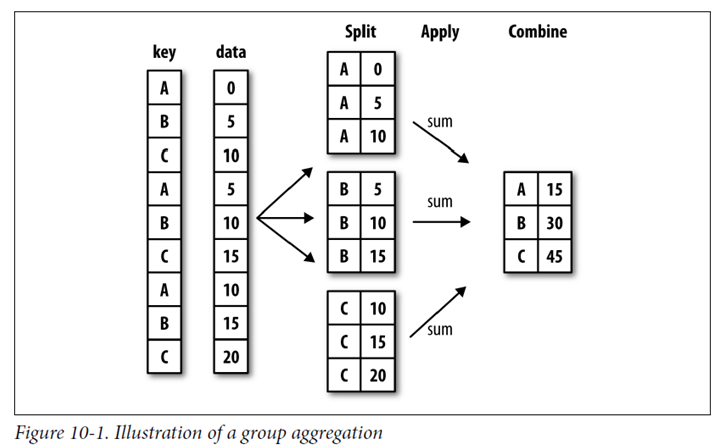

## GroupBy Mechanics

In [ ]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.922264,0.981994
1,a,two,-2.153545,1.105913
2,b,one,-0.365757,-1.613716
3,b,two,-0.375842,1.561587
4,a,one,0.329939,0.406510


In [ ]:
#to compute the mean of the data1 column using the labels from key1. There are a 
#number of ways to do this. One is to access data1 and call groupby
#with the column (a Series) at key1:

#This grouped variable is now a GroupBy object. It has not actually computed 
#anything yet except for some intermediate data about the group key df['key1']. 
#The idea is that this object has all of the information needed to then apply 
#some operation to each of the groups. For example, to compute group means we 
#can call the GroupBy’s mean method:

grouped = df['data1'].groupby(df['key1'])
grouped

In [ ]:
print(df)
print(df['data1'].groupby(df['key1']))
grouped.mean()

  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587
4    a  one  0.329939  0.406510


key1
a   -0.300447
b   -0.370799
Name: data1, dtype: float64

In [ ]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.626102
      two    -2.153545
b     one    -0.365757
      two    -0.375842
Name: data1, dtype: float64

In [ ]:
means.unstack()

key2,one,two
key1,,
a,0.626102,-2.153545
b,-0.365757,-0.375842


In [ ]:
#In this example, the group keys are all Series, though they could be any arrays 
#of the right length:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

#states = np.array(['Ohio', 'Ohio', 'California', 'California','Ohio'])
#years = np.array([2005, 2006, 2005, 2006,2005])

print(df)
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
print(means)


df['data1'].groupby([states, years]).mean()

  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587
4    a  one  0.329939  0.406510
key1  key2
a     one     0.626102
      two    -2.153545
b     one    -0.365757
      two    -0.375842
Name: data1, dtype: float64


California  2005   -2.153545
            2006   -0.365757
Ohio        2005    0.273211
            2006    0.329939
Name: data1, dtype: float64

In [ ]:
#df['data1'].groupby('key1').mean()
print(df.groupby('key1').mean())
df.groupby(['key1', 'key2']).mean()


#You may have noticed in the first case df.groupby('key1').mean() that there is 
#no key2 column in the result. Because df['key2'] is not numeric data, it is 
#said to be a nuisance column, which is therefore excluded from the result. By 
#default, all of thenumeric columns are aggregated, though it is possible to 
#filter down to a subset

         data1     data2
key1                    
a    -0.300447  0.831472
b    -0.370799 -0.026064


data1     data2
key1 key2                    
a    one   0.626102  0.694252
     two  -2.153545  1.105913
b    one  -0.365757 -1.613716
     two  -0.375842  1.561587

In [ ]:
#Regardless of the objective in using groupby, a generally useful GroupBy method 
#is size, which returns a Series containing group sizes:
print(df.groupby(['key1']).size())
df.groupby(['key1', 'key2']).size()

key1
a    3
b    2
dtype: int64


key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups

In [ ]:
print(df)
#The GroupBy object supports iteration, generating a sequence of 2-tuples 
#containing the group name along with the chunk of data. Consider the following:
for name, group in df.groupby('key1'):
    print("Group name is ",name)
    print(group)
    print("End of group ")

  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587
4    a  one  0.329939  0.406510
Group name is  a
  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
4    a  one  0.329939  0.406510
End of group 
Group name is  b
  key1 key2     data1     data2
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587
End of group 


In [ ]:
#In the case of multiple keys, the first element in the tuple will be a tuple 
#of key values:
print(df)
print("\n")
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)
  
#key1 two subgrps are formed from the original data frame: grp a and grp b
#you have to grp based on distinct values of key2: grpa - a,1 and a,2 ; grp b :b,1 and b,2
#a,1;a,2; b,1,b,2

  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587
4    a  one  0.329939  0.406510


('a', 'one')
  key1 key2     data1     data2
0    a  one  0.922264  0.981994
4    a  one  0.329939  0.406510
('a', 'two')
  key1 key2     data1     data2
1    a  two -2.153545  1.105913
('b', 'one')
  key1 key2     data1     data2
2    b  one -0.365757 -1.613716
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.375842  1.561587


In [ ]:
#computing a dict of the data pieces as a one-liner
pieces = dict(list(df.groupby('key1')))
print(pieces['a'])
print("\n")
print(pieces['b'])
print("\n")
print(pieces)

  key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
4    a  one  0.329939  0.406510


  key1 key2     data1     data2
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587


{'a':   key1 key2     data1     data2
0    a  one  0.922264  0.981994
1    a  two -2.153545  1.105913
4    a  one  0.329939  0.406510, 'b':   key1 key2     data1     data2
2    b  one -0.365757 -1.613716
3    b  two -0.375842  1.561587}


In [ ]:
#By default groupby groups on axis=0, but you can group on any of the other axes.
#For example, we could group the columns of our example df here by dtype like so:
print(df.dtypes)
grouped = df.groupby(df.dtypes, axis=1)

key1      object
key2      object
data1    float64
data2    float64
dtype: object


In [ ]:
for dtype, group in grouped:
    print(dtype)
    #input()
    print(group)

float64
      data1     data2
0 -0.204708  1.393406
1  0.478943  0.092908
2 -0.519439  0.281746
3 -0.555730  0.769023
4  1.965781  1.246435
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a Column or Subset of Columns

In [ ]:
#Indexing a GroupBy object created from a DataFrame with a column name or array
#of column names has the effect of column subsetting for aggregation. 
#This means that:
print(df.groupby('key1')['data1'])            #1
print(df.groupby('key1')[['data2']])          #2

#are syntactic sugar for:
print(df['data1'].groupby(df['key1']))        #3 retrieve column data1
df[['data2']].groupby(df['key1'])             #4

#Why double  bracket
#Because inner brackets are just python syntax (literal) for list.
#The outer brackets are the indexer operation of pandas dataframe object.
#In this use case inner ['A', 'B'] defines the list of columns to pass as single 
#argument to the indexer operation, which is denoted by outer brackets.

df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

In [ ]:
#Especially for large datasets, it may be desirable to aggregate only a few 
#columns. For example, in the preceding dataset, to compute means for just the 
#data2 column and get the result as a DataFrame, we could write:
print(df.groupby(['key1', 'key2'])[['data2']].mean())
print("\n")
print(df.groupby(['key1', 'key2'])['data2'].mean())

              data2
key1 key2          
a    one   1.319920
     two   0.092908
b    one   0.281746
     two   0.769023


key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64


In [ ]:
#The object returned by this indexing operation is a grouped DataFrame if a list 
#or array is passed or a grouped Series if only a single column name is passed 
#as a scalar:
s_grouped = df.groupby(['key1', 'key2'])['data2']

print(s_grouped)
s_grouped.mean()

key1  key2
a     one     1.319920
      two     0.092908
b     one     0.281746
      two     0.769023
Name: data2, dtype: float64

### Grouping with Dicts and Series

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
print(people)
people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values
people

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741  0.476985  3.248944 -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757


,a,b,c,d,e
Joe,1.007189,-1.296221,0.274992,0.228913,1.352917
Steve,0.886429,-2.001637,-0.371843,1.669025,-0.438570
Wes,-0.539741,NaN,NaN,-1.021228,-0.577087
Jim,0.124121,0.302614,0.523772,0.000940,1.343810
Travis,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [ ]:
#Now, suppose I have a group correspondence for the columns and want to sum
#together the columns by group:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}
print (mapping)

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}


In [ ]:
#Now, you could construct an array from this dict to pass to groupby, but 
#instead we can just pass the dict ( key 'f' - unused grouping keys are OK):
print(people)
by_column = people.groupby(mapping, axis=1)
by_column.sum()

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757


,blue,red
Joe,0.503905,1.063885
Steve,1.297183,-1.553778
Wes,-1.021228,-1.116829
Jim,0.524712,1.770545
Travis,-4.230992,-2.405455


In [ ]:
#The same functionality holds for Series, which can be viewed as a 
#fixed-size mapping:
print(people)
print(mapping)
map_series = pd.Series(mapping)
print(map_series)
people.groupby(map_series, axis=1).count()

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757
{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}
a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions

In [ ]:
#Using Python functions is a more generic way of defining a group mapping 
#compared with a dict or Series. 

#Any function passed as a group key will be called once per index value, with 
#the return values being used as the group names. 

#More concretely, consider the example DataFrame from the previous  section, 
#which has people’s first names as index values. Suppose you wanted to 
#group by the length of the names; while you could compute an array of string 
#lengths, it’s simpler to just pass the len function:

In [ ]:
print(people)
people.groupby(len).sum()
#3, 5, 3, 3, 6: 3, 5 , 6

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757


,a,b,c,d,e
3,0.591569,-0.993608,0.798764,-0.791374,2.119639
5,0.886429,-2.001637,-0.371843,1.669025,-0.438570
6,-0.713544,-0.831154,-2.370232,-1.860761,-0.860757


In [ ]:
#Mixing functions with arrays, dicts, or Series is not a problem as everything 
#gets converted to arrays internally:
print(people)
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

               a         b         c         d         e
Joe     1.007189 -1.296221  0.274992  0.228913  1.352917
Steve   0.886429 -2.001637 -0.371843  1.669025 -0.438570
Wes    -0.539741       NaN       NaN -1.021228 -0.577087
Jim     0.124121  0.302614  0.523772  0.000940  1.343810
Travis -0.713544 -0.831154 -2.370232 -1.860761 -0.860757


a         b         c         d         e
3 one -0.539741 -1.296221  0.274992 -1.021228 -0.577087
  two  0.124121  0.302614  0.523772  0.000940  1.343810
5 one  0.886429 -2.001637 -0.371843  1.669025 -0.438570
6 two -0.713544 -0.831154 -2.370232 -1.860761 -0.860757

### Grouping by Index Levels

In [ ]:
#A final convenience for hierarchically indexed datasets is the ability to 
#aggregate using one of the levels of an axis index. Let’s look at an example:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                    names=['cty', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df


#Convert arrays to MultiIndex.
#Parameters
#arrayslist / sequence of array-likes
#Each array-like gives one level’s value for each data point. len(arrays) is 
#the number of levels.

#sortorderint or None
#Level of sortedness (must be lexicographically sorted by that level).

#nameslist / sequence of str, optional
#Names for the levels in the index.

#Returns - MultiIndex

cty          US                            JP          
tenor         1         3         5         1         3
0      0.359244 -0.614436 -1.691656  0.758701 -0.682273
1     -1.038534  0.635111 -0.600026 -0.159134 -0.417616
2      1.141487 -2.043018  0.125036  0.203608 -0.884727
3     -0.026877  0.441817  1.003998  0.682841  0.326045

In [ ]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


In [ ]:
#hier_df.groupby(level='cty').count()
#Will not work because cty level indexing is on columns and not on rows

## Data Aggregation

In [ ]:
#Aggregations refer to any data transformation that produces scalar values from
#arrays. The preceding examples have used several of them, including mean, count,
#min, and sum. You may wonder what is going on when you invoke mean() on a
#GroupBy object. Many common aggregations, such as those found below have 
#optimized implementations. 

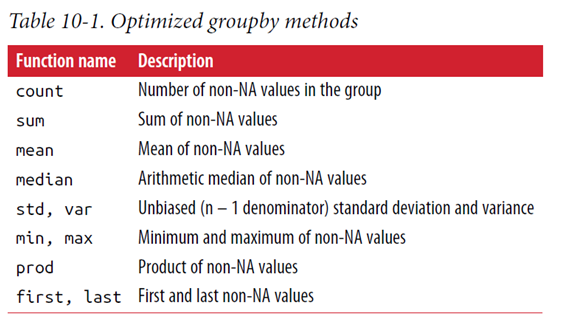

In [ ]:
#While quantile is not explicitly implemented for GroupBy, it is a Series method 
#and thus available for use. Internally, GroupBy efficiently slices up the 
#Series, calls piece.quantile(0.9) for each piece, and then assembles those 
#results together into the result object:
print(df)
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

#.quantile: Return values at the given quantile over requested axis.

  key1 key2     data1     data2
0    a  one -0.204708  1.393406
1    a  two  0.478943  0.092908
2    b  one -0.519439  0.281746
3    b  two -0.555730  0.769023
4    a  one  1.965781  1.246435


key1
a    1.668413
b   -0.523068
Name: data1, dtype: float64

In [ ]:
#To use your own aggregation functions, pass any function that aggregates an 
#array to the aggregate or agg method:
def peak_to_peak(arr):
    return arr.max() - arr.min()
    
grouped.agg(peak_to_peak)


#Custom aggregation functions are generally much slower than the optimized 
#functions found in above Table 10-1. This is because there is some extra 
#overhead (function calls, data rearrangement) in constructing the intermediate 
#group data chunks.

,data1,data2
key1,,
a,2.170488,1.300498
b,0.036292,0.487276


In [ ]:
#You may notice that some methods like describe also work, even though they are 
#not aggregations, strictly speaking:
grouped.describe()

data1                      ...     data2                    
     count      mean       std  ...       50%       75%       max
key1                            ...                              
a      3.0  0.746672  1.109736  ...  1.246435  1.319920  1.393406
b      2.0 -0.537585  0.025662  ...  0.525384  0.647203  0.769023

[2 rows x 16 columns]

### Column-Wise and Multiple Function Application

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [ ]:
#group the tips by day and smoker:
grouped = tips.groupby(['day', 'smoker'])
#grouped.dtypes

In [ ]:
grouped_pct = grouped['tip_pct']
print(grouped['tip_pct'])
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [ ]:
#If you pass a list of functions or function names instead, you get back a 
#DataFrame with column names taken from the functions:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [ ]:
#if you pass a list of (name, function) tuples, the first element of each tuple 
#will be used as the DataFrame column names (you can think of a list of 2-tuples
# as an ordered mapping):
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [ ]:
#With a DataFrame you have more options, as you can specify a list of functions 
#to apply to all of the columns or different functions per column. Suppose we
#wanted to compute the same three statistics for the tip_pct and total_bill
#columns:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [ ]:
#the resulting DataFrame has hierarchical columns, the same as you would get 
#aggregating each column separately and using concat to glue the results 
#together using the column names as the keys argument:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [ ]:
#a list of tuples with custom names can be passed:
ftuples = [('Abc', 'mean'), ('Def', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


tip_pct           total_bill            
                  Abc       Def        Abc         Def
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [ ]:
#suppose you wanted to apply potentially different functions to one or more of
#the columns. To do this, pass a dict to agg that contains a mapping of column 
#names to any of the function specifications listed so far:
print(grouped.agg({'tip' : np.max, 'size' : 'sum'}))
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})



#A DataFrame will have hierarchical columns only if multiple functions are
# applied to at least one column.

               tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40


tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning Aggregated Data Without Row Indexes

In [ ]:
#In all of the examples up until now, the aggregated data comes back with an 
#index, potentially hierarchical, composed from the unique group key 
#combinations. Since this isn’t always desirable, you can disable this behavior 
#in most cases by passing as_index=False to groupby:
tips.groupby(['day', 'smoker'], as_index=False).mean()



#it’s always possible to obtain the result in this format by calling reset_index 
#on the result. Using the as_index=False method avoids some unnecessary
#computations.

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Apply: General split-apply-combine

In [ ]:
#Returning to the tipping dataset from before, suppose you wanted to select the 
#top five tip_pct values by group. First, write a function that selects the rows 
#with the largest values in a particular column


#positional arguments
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [ ]:
df = pd.DataFrame({
    'col1': ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col2': [2, 1, 9, 8, 7, 4],
    'col3': [0, 1, 9, 4, 2, 3],
})

#print(df.sort_values(by=['col1'])) #Sort by single column

#print(df.sort_values(by=['col1', 'col2'])) #Sort by multiple column

#print(df.sort_values(by='col1', ascending=False)) #Descending Sort

#Null values should appear first
#print(df.sort_values(by='col1', ascending=False, na_position='first'))
print(df)
print(df.sort_values(by='col1'))
df.sort_values(by='col1')[-2:]


#Try on a list
#a=[1,2,3,4,5,6,7,8,9,10]
#print(a[-3:])

  col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
3  NaN     8     4
4    D     7     2
5    C     4     3
  col1  col2  col3
0    A     2     0
1    A     1     1
2    B     9     9
5    C     4     3
4    D     7     2
3  NaN     8     4


,col1,col2,col3
4,D,7,2
3,NaN,8,4


In [ ]:
#Now, if we group by smoker, and call apply with this function, we get the
#following:
tips.groupby('smoker').apply(top)

#The top function is called on each row group from the DataFrame, and then the 
#results are glued together using pandas.concat, labeling the pieces with the 
#group names. The result therefore has a hierarchical index whose inner level 
#contains index values from the original DataFrame.

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [ ]:
#If you pass a function to apply that takes other arguments or keywords, you 
#can pass these after the function:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')




#Beyond these basic usage mechanics, getting the most out of apply may require 
#some creativity. What occurs inside the function passed is up to you; it only 
#needs to return a pandas object or a scalar value.

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [ ]:
#describe on a GroupBy object:
result = tips.groupby('smoker')['tip_pct'].describe()
print(result)
result.unstack('smoker')

        count      mean       std  ...       50%       75%       max
smoker                             ...                              
No      151.0  0.159328  0.039910  ...  0.155625  0.185014  0.291990
Yes      93.0  0.163196  0.085119  ...  0.153846  0.195059  0.710345

[2 rows x 8 columns]


       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

Inside GroupBy, when you invoke a method like describe, it is actually just a shortcut for:
f = lambda x: x.describe()
grouped.apply(f)

### Suppressing the Group Keys

In [ ]:
#In the preceding examples, you see that the resulting object has a hierarchical 
#index formed from the group keys along with the indexes of each piece of the 
#original object. You can disable this by passing group_keys=False to groupby:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


### Quantile and Bucket Analysis

In [ ]:
#pandas has some tools, in particular cut and qcut, for slicing data up into 
#buckets with bins of your choosing or by sample quantiles. 

#Combining these functions with groupby makes it convenient to perform bucket or
#quantile analysis on a dataset. 

In [ ]:
#Consider a simple random dataset and an equal-length bucket categorization 
#using cut:

frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
print(frame.head())
print("\n")
quartiles = pd.cut(frame.data1, 4)
quartiles[:10]

      data1     data2
0  1.032549 -1.131414
1  1.054085  0.490516
2 -1.277746 -0.032514
3  0.644594  0.519580
4  0.806798 -0.369671




0     (-0.06, 1.733]
1     (-0.06, 1.733]
2    (-1.853, -0.06]
3     (-0.06, 1.733]
4     (-0.06, 1.733]
5    (-1.853, -0.06]
6    (-1.853, -0.06]
7     (-0.06, 1.733]
8    (-1.853, -0.06]
9    (-1.853, -0.06]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.653, -1.853] < (-1.853, -0.06] < (-0.06, 1.733] <
                                    (1.733, 3.526]]

In [ ]:
#The Categorical object returned by cut can be passed directly to groupby. 
#So we could compute a set of statistics for the data2 column like so:

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.653, -1.853]",-1.236664,2.135719,36.0,0.098801
"(-1.853, -0.06]",-3.018842,2.903300,454.0,-0.018190
"(-0.06, 1.733]",-3.333767,2.497837,478.0,-0.027172
"(1.733, 3.526]",-2.494075,1.676926,32.0,-0.096919


In [ ]:
#These were equal-length buckets; to compute equal-size buckets based on sample
#quantiles, use qcut. I’ll pass labels=False to just get quantile numbers:

# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-3.018842,2.146716,100.0,-0.072422
1,-2.641014,2.038456,100.0,-0.053127
2,-2.453248,2.285401,100.0,0.095573
3,-2.901831,2.903300,100.0,-0.023037
4,-2.251291,2.209647,100.0,0.013266
5,-3.108915,2.497837,100.0,-0.060342
6,-1.866563,2.228700,100.0,-0.052026
7,-3.333767,2.430878,100.0,0.028525
8,-2.428129,2.215585,100.0,-0.004802


### Example: Filling Missing Values with Group-Specific       Values

In [ ]:
#When cleaning up missing data, in some cases you will replace data observations
#using dropna, but in others you may want to impute (fill in) the null (NA) values
#using a fixed value or some value derived from the data. fillna is the right 
#tool to use; for example, here I fill in NA values with the mean:

In [ ]:
import numpy as np
s = pd.Series(np.random.randn(6))
print(s)
print("\n")
s[::2] = np.nan

print(s)
print("\n")
print("Mean is",s.mean())
#s.fillna(0,inplace=True)
s.fillna(s.mean(),inplace=True)
print(s)

0   -0.439407
1    0.571900
2   -0.549629
3    0.246866
4    0.300920
5   -0.217146
dtype: float64


0         NaN
1    0.571900
2         NaN
3    0.246866
4         NaN
5   -0.217146
dtype: float64


Mean is 0.20054035932669836
0    0.200540
1    0.571900
2    0.200540
3    0.246866
4    0.200540
5   -0.217146
dtype: float64


In [ ]:
#A step can also be used after a second colon to, say, take every other element:
#seq[::2]

#A clever use of this is to pass -1, which has the useful effect of reversing a 
#list or tuple:
#seq[::-1]
#[1, 0, 6, 5, 3, 6, 3, 2, 7]

In [ ]:
#Suppose you need the fill value to vary by group. One way to do this is to 
#group the data and use apply with a function that calls fillna on each data 
#chunk. sample data on US states divided into eastern & western regions:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8), index=states)
print(group_key)
data

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']


Ohio         -0.274138
New York      1.188742
Vermont      -3.183867
Florida       1.050471
Oregon       -1.042736
Nevada        1.680374
California   -0.720992
Idaho        -1.405314
dtype: float64

In [ ]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
print(data)
data.groupby(group_key).mean()

Ohio          0.922264
New York     -2.153545
Vermont            NaN
Florida      -0.375842
Oregon        0.329939
Nevada             NaN
California    1.105913
Idaho              NaN
dtype: float64


East   -0.535707
West    0.717926
dtype: float64

In [ ]:
fill_mean = lambda g: g.fillna(g.mean())


data.groupby(group_key).apply(fill_mean)

Ohio         -0.274138
New York      1.188742
Vermont      -3.183867
Florida       1.050471
Oregon       -1.042736
Nevada        1.680374
California   -0.720992
Idaho        -1.405314
dtype: float64

In [ ]:
#you might have predefined fill values in your code that vary by group. Since 
#the groups have a name attribute set internally, we can use that:

fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.922264
New York     -2.153545
Vermont       0.500000
Florida      -0.375842
Oregon        0.329939
Nevada       -1.000000
California    1.105913
Idaho        -1.000000
dtype: float64

### Example: Random Sampling and Permutation

In [ ]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4    
#1,2,3,4,5,6,7,8,9,10,10,10,10 is repeated 4 times

print(card_val)
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
#a, 2,3,4,5,6,7,8,9,10, J, K , Q

print(base_names)
cards = []            # Empty List
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

print(cards)
deck = pd.Series(card_val, index=cards)

#Difference between append() and extend() method of list
#append(): A list is an object. If you append another list onto a list, the parameter list will be a single object at the end of the list.
#extend(): Iterates over its argument and adding each element to the list and extending the list. 
#The length of the list increases by number of elements in it’s argument.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']
['AH', '2H', '3H', '4H', '5H', '6H', '7H', '8H', '9H', '10H', 'JH', 'KH', 'QH', 'AS', '2S', '3S', '4S', '5S', '6S', '7S', '8S', '9S', '10S', 'JS', 'KS', 'QS', 'AC', '2C', '3C', '4C', '5C', '6C', '7C', '8C', '9C', '10C', 'JC', 'KC', 'QC', 'AD', '2D', '3D', '4D', '5D', '6D', '7D', '8D', '9D', '10D', 'JD', 'KD', 'QD']


In [ ]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [ ]:
#drawing a hand of five cards from the deck could be written as:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

#.sample: Return a random sample of items from an axis of object.

5H     5
4S     4
QC    10
4C     4
3S     3
dtype: int64

In [ ]:
#Suppose you wanted two random cards from each suit. Because the suit is the 
#last character of each card name, we can group based on this and use apply:

get_suit = lambda card: card[-1] # last letter is suit

deck.groupby(get_suit).apply(draw, n=2)

C  9C      9
   10C    10
D  4D      4
   KD     10
H  2H      2
   QH     10
S  8S      8
   4S      4
dtype: int64

In [ ]:
#To suppress group names
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

JC    10
KC    10
KD    10
5D     5
JH    10
2H     2
KS    10
QS    10
dtype: int64

### Example: Group Weighted Average and Correlation

In [ ]:
#Under the split-apply-combine paradigm of groupby, operations between columns 
#in a DataFrame or two Series, such as a group weighted average, are possible. 
#As an example, take dataset containing group keys, values, and some weights:

In [ ]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a',
                                'b', 'b', 'b', 'b'],
                   'data': [1,1,1,1,2,2,2,2],#'data': np.random.randn(8),
                   'weights': [10,10,10,10,20,20,20,4]})#'weights': np.arange(8)})
df

,category,data,weights
0,a,1,10
1,a,1,10
2,a,1,10
3,a,1,10
4,b,2,20
5,b,2,20
6,b,2,20
7,b,2,4


In [ ]:
#The group weighted average by category would then be:

grouped = df.groupby('category')

get_wavg = lambda g: np.average(g['data'], weights=g['weights'],returned=True)

grouped.apply(get_wavg)



#Weighted average is an average resulting from the multiplication of each 
#component by a factor reflecting its importance. The numpy.average() function 
#computes the weighted average of elements in an array according to their 
#respective weight given in another array. The function can have an axis 
#parameter. If the axis is not specified, the array is flattened.

#Considering an array [1,2,3,4] and corresponding weights [4,3,2,1], the 
#weighted average is calculated by adding the product of the corresponding 
#elements and dividing the sum by the sum of weights.

#Weighted average = (1*4+2*3+3*2+4*1)/(4+3+2+1)

category
a    (1.0, 40.0)
b    (2.0, 64.0)
dtype: object

In [ ]:
#As another example, consider a financial dataset originally obtained from Yahoo!
#Finance containing end-of-day prices for a few stocks and the S&P 500 index 
#(the SPX symbol):
#The S&P 500 or Standard & Poor's 500 Index is a market-capitalization-weighted 
#index of the 500 largest U.S. publicly traded companies
import pandas as pd
close_px = pd.read_csv('stock_px_2.csv', parse_dates=True,
                       index_col=0)
close_px.info()
close_px[-4:]



#pandas.info:Print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and 
#column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [ ]:
#create a function that computes the pairwise correlation of each column
#with the 'SPX' column:

spx_corr = lambda x: x.corrwith(x['SPX'])

#corrwith: Compute pairwise correlation.
#Pairwise correlation is computed between rows or columns of DataFrame with 
#rows or columns of Series or DataFrame. DataFrames are first aligned along both 
#axes before computing the correlations.

In [ ]:
#compute percent change on close_px using pct_change:
rets = close_px.pct_change().dropna()
rets
#Percentage change between the current and a prior element.
#Computes the percentage change from the immediately previous row by default. 
#This is useful in comparing the percentage of change in a time series of elements.

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [ ]:
#Lastly, we group these percent changes by year, which can be extracted from 
#each row label with a one-line function that returns the year attribute of 
#each datetime label:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [ ]:
#You could also compute inter-column correlations. Here we compute the 
#annual correlation between Apple and Microsoft:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Example: Group-Wise Linear Regression

In [ ]:
#using the statsmodels econometrics library, which executes an ordinary least
#squares (OLS) regression on each chunk of data:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]             #y=mx+c
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [ ]:
#Linear regression example and explanation
#https://www.displayr.com/what-is-linear-regression/
#https://medium.com/@dhwajraj/python-regression-analysis-part-2-gearing-up-863207a625c3

In [ ]:
#yearly linear regression of AAPL on SPX returns, execute:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## Pivot Tables and Cross-Tabulation

In [ ]:
tips = pd.read_csv('tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]
tips.pivot_table(index=['day', 'smoker'])


#https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [ ]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [ ]:
print(tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True))

tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=False)


day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0


day            Fri   Sat   Sun  Thur
time   smoker                       
Dinner No      3.0  45.0  57.0   1.0
       Yes     9.0  42.0  19.0   NaN
Lunch  No      1.0   NaN   NaN  44.0
       Yes     6.0   NaN   NaN  17.0

In [ ]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
...                      ...       ...       ...       ...
Lunch  3    Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

[21 rows x 4 columns]

Crosstab: “Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.”


Pivot Table: “Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (Hierarchical indexes on the index and columns of the result DataFrame.


#https://medium.com/@yangdustin5/quick-guide-to-pandas-pivot-table-crosstab-40798b33e367#:~:text=Crosstab%3A%20%E2%80%9CCompute%20a%20simple%20cross,pivot%20table%20as%20a%20DataFrame.&text=Both%20create%20tables%20and%20compare%20features%2Fcolumns%20of%20data.

### Cross-Tabulations: Crosstab

In [ ]:
#Compute a simple cross tabulation of two (or more) factors. By default computes 
#a frequency table of the factors unless an array of values and an aggregation 
#function are passed.
from io import StringIO
data = """\
Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')




#https://pbpython.com/pandas-crosstab.html

In [ ]:
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [ ]:
pd.crosstab(data.Nationality, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [ ]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [ ]:
#pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion